In [14]:
# Work 12
## Preparing for subsequent analysis: checking correlation, checking multicollinearity
## Building independent variable set
## Applying logistic regression analysis
## Applying random forest classification

In [15]:
# loading libraries
import torch
torch.cuda.empty_cache() 
import os 
os.environ['MPLCONFIGDIR'] = os.getcwd() + "/configs/"
import matplotlib
from matplotlib import pyplot as plt
import numpy as np
import cv2
import urllib.request
from PIL import Image
import pandas as pd
import pyproj
from pathlib import Path
import sklearn
import seaborn as sn
from scipy import stats
from tabulate import tabulate
import statsmodels.api as sm
import statsmodels.tools as tools
import sklearn
from sklearn import metrics
from sklearn.metrics import accuracy_score
from sklearn.metrics import accuracy_score, confusion_matrix, roc_auc_score, roc_curve
from sklearn.model_selection import train_test_split
from sklearn import linear_model
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import PowerTransformer
from sklearn.preprocessing import MinMaxScaler
from statsmodels.stats.outliers_influence import variance_inflation_factor
import category_encoders as ce
from sklearn import svm
# For regression
from sklearn.ensemble import RandomForestRegressor
# from sklearn.metrics import PredictionErrorDisplay
import mlxtend
# For stepwise feature selection
from mlxtend.feature_selection import SequentialFeatureSelector
from mlxtend.plotting import plot_sequential_feature_selection as plot_sfs
from sklearn.inspection import permutation_importance
import joblib
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

In [19]:
# loading written functions
from mtp_function_yl import *

In [27]:
# version control
%load_ext watermark
%watermark  -u -d -v -m --iversions

Last updated: 2025-04-07

Python implementation: CPython
Python version       : 3.9.7
IPython version      : 7.29.0

Compiler    : MSC v.1916 64 bit (AMD64)
OS          : Windows
Release     : 10
Machine     : AMD64
Processor   : Intel64 Family 6 Model 158 Stepping 10, GenuineIntel
CPU cores   : 12
Architecture: 64bit

pyproj           : 3.3.1
numpy            : 1.26.4
torch            : 2.0.1
scipy            : 1.11.3
pandas           : 1.3.4
shapely          : 1.8.2
seaborn          : 0.11.2
statsmodels      : 0.14.1
category_encoders: 2.6.4
matplotlib       : 3.4.3
cv2              : 4.8.1
joblib           : 1.4.2
mlxtend          : 0.23.1
PIL              : 8.4.0
sklearn          : 1.5.1



### Data loading

In [28]:
# loading transformed variables
dfacrpv = pd.read_csv('../mtp_jan/model_acp_transformed_corr.csv')

In [29]:
print(dfacrpv.columns)

Index(['Nr', 'cmean', 'cmin', 'csum', 'cmax', 'cp', 'mewmin', 'megmin',
       'iemin', 'mewmax', 'megmax', 'iemax', 'mew', 'meg', 'ie', 'dbusl',
       'dtraml', 'dtrainl', 'dplight', 'dstation', 'dparkcar', 'dparktw',
       'dpedcro', 'dstopsign', 'dtrafficarea', 'droad', 'droad_sl', 'dvfpath',
       'gvm_dwv', 'gvm_msp', 'gvm_asp', 'r_width', 'speedlimit',
       'bicyclecount', 'carcount', 'z_qnr_1', 'z_qnr_2', 'z_qnr_3', 'z_qnr_4',
       'z_qnr_5', 'z_qnr_6', 'z_qnr_7', 'z_qnr_8', 'z_qnr_9', 'z_qnr_10',
       'z_qnr_11', 'z_qnr_12', 'z_qnr_13', 'z_qnr_14', 'z_qnr_15', 'z_qnr_16',
       'z_qnr_17', 'z_qnr_18', 'z_qnr_19', 'z_qnr_20', 'z_qnr_21', 'z_qnr_22',
       'z_qnr_23', 'z_qnr_24', 'z_qnr_25', 'z_qnr_26', 'z_qnr_27', 'z_qnr_28',
       'z_qnr_29', 'z_qnr_30', 'z_qnr_31', 'z_qnr_32', 'z_qnr_33', 'z_knr_1',
       'z_knr_2', 'z_knr_3', 'z_knr_4', 'z_knr_5', 'z_knr_6', 'z_knr_7',
       'z_knr_8', 'z_knr_9', 'z_knr_10', 'z_knr_11', 'trafficarea_1',
       'trafficarea_2', '

### Checking correlation and multicollinearity

In [30]:
cn = ['cmean', 'cmin', 'csum', 'cmax', 'cp', 'mewmin', 'megmin',
       'iemin', 'mewmax', 'megmax', 'iemax', 'mew', 'meg', 'ie', 'dbusl',
       'dtraml', 'dtrainl', 'dplight', 'dstation', 'dparkcar', 'dparktw',
       'dpedcro', 'dstopsign', 'dtrafficarea', 'droad', 'droad_sl',
       'gvm_dwv', 'gvm_msp', 'gvm_asp', 'r_width', 'speedlimit',
       'bicyclecount', 'carcount', 'z_qnr_1', 'z_qnr_2', 'z_qnr_3', 'z_qnr_4',
       'z_qnr_5', 'z_qnr_6', 'z_qnr_7', 'z_qnr_8', 'z_qnr_9', 'z_qnr_10',
       'z_qnr_11', 'z_qnr_12', 'z_qnr_13', 'z_qnr_14', 'z_qnr_15', 'z_qnr_16',
       'z_qnr_17', 'z_qnr_18', 'z_qnr_19', 'z_qnr_20', 'z_qnr_21', 'z_qnr_22',
       'z_qnr_23', 'z_qnr_24', 'z_qnr_25', 'z_qnr_26', 'z_qnr_27', 'z_qnr_28',
       'z_qnr_29', 'z_qnr_30', 'z_qnr_31', 'z_qnr_32', 'z_qnr_33', 'z_knr_1',
       'z_knr_2', 'z_knr_3', 'z_knr_4', 'z_knr_5', 'z_knr_6', 'z_knr_7',
       'z_knr_8', 'z_knr_9', 'z_knr_10', 'z_knr_11', 'trafficarea_1',
       'trafficarea_2', 'r_width_1', 'r_width_2', 'r_width_3', 'r_width_4',
       'r_width_5', 'r_width_6', 'speedlimit_1', 'speedlimit_2',
       'speedlimit_3', 'speedlimit_4', 'speedlimit_5', 'speedlimit_6']
dfi = dfacrpv[cn]

In [37]:
# checking correlation
corr_m = dfi.corr()
sorted_corrm = corr_m.unstack().sort_values()
upper_corrm = corr_m.where(
                np.triu(np.ones(corr_m.shape),k = 1).astype(bool))
unique_corrpair = upper_corrm.unstack().dropna()
sorted_uni_cp = unique_corrpair.sort_values()
dfsucp = sorted_uni_cp.to_frame()
dfsucp = dfsucp.rename(columns = {0:'corr'})
dfcorr_high = dfsucp.loc[(dfsucp['corr'] <= -0.8) | (dfsucp['corr'] >= 0.8)]
dfcorr_high

,,corr
speedlimit_4,speedlimit,-0.822594
z_knr_10,z_qnr_15,0.818377
z_knr_7,z_qnr_8,0.853376
mew,mewmax,0.853716
meg,megmin,0.859011
mew,mewmin,0.872107
cp,cmean,0.908996
ie,iemax,0.920179
cp,csum,0.927290
droad_sl,droad,0.942433


In [38]:
# from previous step, the following variables need to be removed:
# speedlimit_4, z_qnr_15, z_qnr_8, mewmax, megmin, mewmin, cmean, iemax, csum, 
# droad_sl, cmax, iemin, gvm_asp, gvm_msp
# updated list of variable names
cnu = ['cp', 'cmin',  
       'ie', 'mew', 'meg', 'megmax', 'dbusl',
       'dtraml', 'dtrainl', 'dplight', 'dstation', 'dparkcar', 'dparktw',
       'dpedcro', 'dstopsign', 'dtrafficarea', 'droad',
       'gvm_dwv', 'r_width', 'speedlimit',
       'bicyclecount', 'carcount', 'z_qnr_1', 'z_qnr_2', 'z_qnr_3', 'z_qnr_4',
       'z_qnr_5', 'z_qnr_6', 'z_qnr_7', 'z_qnr_9', 'z_qnr_10',
       'z_qnr_11', 'z_qnr_12', 'z_qnr_13', 'z_qnr_14', 'z_qnr_16',
       'z_qnr_17', 'z_qnr_18', 'z_qnr_19', 'z_qnr_20', 'z_qnr_21', 'z_qnr_22',
       'z_qnr_23', 'z_qnr_24', 'z_qnr_25', 'z_qnr_26', 'z_qnr_27', 'z_qnr_28',
       'z_qnr_29', 'z_qnr_30', 'z_qnr_31', 'z_qnr_32', 'z_qnr_33', 'z_knr_1',
       'z_knr_2', 'z_knr_3', 'z_knr_4', 'z_knr_5', 'z_knr_6', 'z_knr_7',
       'z_knr_8', 'z_knr_9', 'z_knr_10', 'z_knr_11', 'trafficarea_1',
       'trafficarea_2', 'r_width_1', 'r_width_2', 'r_width_3', 'r_width_4',
       'r_width_5', 'r_width_6', 'speedlimit_1', 'speedlimit_2',
       'speedlimit_3', 'speedlimit_5', 'speedlimit_6']

In [43]:
# checking multicollinearity using VIF(Variance Inflation factor)
X = dfacrpv[cnu]
X = tools.add_constant(X)
dfcnu_vif = pd.DataFrame()
dfcnu_vif["feature"] = X.columns
dfcnu_vif["VIF"] = [variance_inflation_factor(X.values, i)
                          for i in range(len(X.columns))]
viflow = dfcnu_vif.loc[dfcnu_vif['VIF'] <= 5]
vifl = viflow['feature'].tolist()
cnforvif = ['cp', 'cmin',  
       'ie', 'mew', 'meg', 'megmax', 'dbusl',
       'dtraml', 'dtrainl', 'dplight', 'dstation', 'dparkcar', 'dparktw',
       'dpedcro', 'dstopsign', 'dtrafficarea', 'droad',
       'gvm_dwv', 'r_width', 'speedlimit',
       'bicyclecount', 'carcount', 'z_qnr_1', 'z_qnr_2', 'z_qnr_3', 'z_qnr_4',
       'z_qnr_5', 'z_qnr_6', 'z_qnr_7', 'z_qnr_9', 'z_qnr_10',
       'z_qnr_11', 'z_qnr_12', 'z_qnr_13', 'z_qnr_14', 'z_qnr_16',
       'z_qnr_17', 'z_qnr_18', 'z_qnr_19', 'z_qnr_20', 'z_qnr_21', 'z_qnr_22',
       'z_qnr_23', 'z_qnr_24', 'z_qnr_25', 'z_qnr_26', 'z_qnr_27', 'z_qnr_28',
       'z_qnr_29', 'z_qnr_30', 'z_qnr_31', 'z_qnr_32', 'z_qnr_33', 'z_knr_1',
       'z_knr_2', 'z_knr_3', 'z_knr_4', 'z_knr_5', 'z_knr_6', 'z_knr_7',
       'z_knr_8', 'z_knr_9', 'z_knr_10', 'z_knr_11', 'trafficarea_1',
       'trafficarea_2', 'r_width_1', 'r_width_2', 'r_width_3', 'r_width_4',
       'r_width_5', 'r_width_6', 'speedlimit_1', 'speedlimit_2',
       'speedlimit_3', 'speedlimit_5', 'speedlimit_6']
# calculating VIF for each feature
# the following variables need to be removed based on VIF result
# Remove 'z_qnr_18', 'z_qnr_19', 'z_qnr_29', 'z_qnr_30',  
# Remove 'z_qnr_16', 'z_qnr_5',  'z_qnr_20', 'z_qnr_27', 'z_qnr_10',
# Remove 'z_knr_8', 'speedlimit_1', 'z_knr_1', 'z_knr_5', 'r_width_2', 
# Remove 'z_knr_6','z_knr_4','r_width'
# create a list of variable names after removing the variables with high multicollinearity
cntry0 = ['cp', 'cmin',
       'ie', 'mew', 'meg', 'megmax', 'dbusl',
       'dtraml', 'dtrainl', 'dplight', 'dstation', 'dparkcar', 'dparktw',
       'dpedcro', 'dstopsign', 'dtrafficarea', 'droad',
       'gvm_dwv',  'speedlimit',
       'bicyclecount', 'carcount', 'z_qnr_1', 'z_qnr_2', 'z_qnr_3', 'z_qnr_4',
        'z_qnr_6', 'z_qnr_7', 'z_qnr_9',
       'z_qnr_11', 'z_qnr_12', 'z_qnr_13', 'z_qnr_14',
       'z_qnr_17',  'z_qnr_21', 'z_qnr_22',
       'z_qnr_23', 'z_qnr_24', 'z_qnr_25', 'z_qnr_26', 'z_qnr_28',
         'z_qnr_31', 'z_qnr_32', 'z_qnr_33',
       'z_knr_2', 'z_knr_3',  'z_knr_7',
        'z_knr_9', 'z_knr_10', 'z_knr_11', 'trafficarea_1',
       'trafficarea_2', 'r_width_1',  'r_width_3', 'r_width_4',
       'r_width_5', 'r_width_6', 'speedlimit_2',
       'speedlimit_3', 'speedlimit_5', 'speedlimit_6']
X = dfacrpv[cntry0]
X = tools.add_constant(X)
dfcnu_vif1 = pd.DataFrame()
dfcnu_vif1["feature"] = X.columns
dfcnu_vif1["VIF"] = [variance_inflation_factor(X.values, i)
                          for i in range(len(X.columns))]
print(dfcnu_vif1.sort_values(by = ['VIF']))

         feature        VIF
2           cmin   1.077604
3             ie   1.170543
59  speedlimit_5   1.199438
35      z_qnr_22   1.214720
53     r_width_3   1.217752
..           ...        ...
16  dtrafficarea   2.821565
47       z_knr_9   2.870266
49      z_knr_11   3.787517
44       z_knr_2   3.964978
0          const  62.561304

[61 rows x 2 columns]


In [46]:
# creating a list of independent variables after filtering out the ones with high correlation and high multicollinearity
cn_vif = dfcnu_vif1['feature'].tolist()
cn_vif.remove('const')

['cp', 'cmin', 'ie', 'mew', 'meg', 'megmax', 'dbusl', 'dtraml', 'dtrainl', 'dplight', 'dstation', 'dparkcar', 'dparktw', 'dpedcro', 'dstopsign', 'dtrafficarea', 'droad', 'gvm_dwv', 'speedlimit', 'bicyclecount', 'carcount', 'z_qnr_1', 'z_qnr_2', 'z_qnr_3', 'z_qnr_4', 'z_qnr_6', 'z_qnr_7', 'z_qnr_9', 'z_qnr_11', 'z_qnr_12', 'z_qnr_13', 'z_qnr_14', 'z_qnr_17', 'z_qnr_21', 'z_qnr_22', 'z_qnr_23', 'z_qnr_24', 'z_qnr_25', 'z_qnr_26', 'z_qnr_28', 'z_qnr_31', 'z_qnr_32', 'z_qnr_33', 'z_knr_2', 'z_knr_3', 'z_knr_7', 'z_knr_9', 'z_knr_10', 'z_knr_11', 'trafficarea_1', 'trafficarea_2', 'r_width_1', 'r_width_3', 'r_width_4', 'r_width_5', 'r_width_6', 'speedlimit_2', 'speedlimit_3', 'speedlimit_5', 'speedlimit_6'] 60


In [52]:
# preparing for modelling
cnvif = cn_vif
# dependent variable
y = dfacrpv['acp']
# independent variables
x = dfacrpv[cnvif] # Variables after filtering with correlation and VIF (60)
x.shape
# 1087 points with 78 features in total

(1087, 60)

### Logistic regression analysis

In [83]:
# splitting the data for train set and test set
X_train1, X_test1, y_train1, y_test1 = train_test_split(
        x_const, y,
        test_size=0.25,
        random_state=7)
# applying logistic regression
m00_log_split = sm.Logit(y_train1,X_train1, max_iter = 10000)
r00_log_split = m00_log_split.fit(method='bfgs')
r00_log_split.summary()

E:\Anaconda\Anaconda_file\lib\site-packages\statsmodels\base\model.py:130: ValueWarning: unknown kwargs ['max_iter']
  warnings.warn(msg, ValueWarning)
E:\Anaconda\Anaconda_file\lib\site-packages\scipy\optimize\_optimize.py:1360: OptimizeWarning: Maximum number of iterations has been exceeded.
  res = _minimize_bfgs(f, x0, args, fprime, callback=callback, **opts)
E:\Anaconda\Anaconda_file\lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
E:\Anaconda\Anaconda_file\lib\site-packages\statsmodels\base\model.py:130: ValueWarning: unknown kwargs ['max_iter']
  warnings.warn(msg, ValueWarning)


         Current function value: 0.179164
         Iterations: 35
         Function evaluations: 36
         Gradient evaluations: 36


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                    acp   No. Observations:                  815
Model:                          Logit   Df Residuals:                      754
Method:                           MLE   Df Model:                           60
Date:                Mon, 07 Apr 2025   Pseudo R-squ.:                  0.6947
Time:                        16:03:22   Log-Likelihood:                -146.02
converged:                      False   LL-Null:                       -478.26
Covariance Type:            nonrobust   LLR p-value:                8.383e-103
=================================================================================
                    coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------
const            -1.0248      1.578     -0.649      0.516      -4.118       2.068
cp               -0.5411      0.195     -2.771      0.006      -0.924      -0.158
cmin              0.7933      1.154      0.688      0.492      -1.468       3.054
ie               -0.8007      0.414     -1.936      0.053      -1.611       0.010
mew               3.6324      0.669      5.430      0.000       2.321       4.944
meg              -0.2238      0.756     -0.296      0.767      -1.706       1.258
megmax           -0.1855      0.760     -0.244      0.807      -1.675       1.304
dbusl             0.8783      0.477      1.841      0.066      -0.057       1.813
dtraml           -0.3246      0.514     -0.631      0.528      -1.332       0.683
dtrainl           0.6039      0.620      0.974      0.330      -0.611       1.819
dplight          -1.1531      0.783     -1.473      0.141      -2.688       0.382
dstation         -1.4212      0.831     -1.711      0.087      -3.049       0.207
dparkcar          0.1981      0.608      0.326      0.745      -0.994       1.390
dparktw          -0.6935      0.660     -1.052      0.293      -1.986       0.599
dpedcro          -1.6546      0.644     -2.569      0.010      -2.917      -0.392
dstopsign        -0.2651      0.742     -0.357      0.721      -1.719       1.188
dtrafficarea     -0.5623      0.399     -1.408      0.159      -1.345       0.220
droad             2.8781      0.320      8.984      0.000       2.250       3.506
gvm_dwv           0.5520      0.515      1.071      0.284      -0.458       1.562
speedlimit       -1.0916      0.534     -2.044      0.041      -2.138      -0.045
bicyclecount      6.9914      1.017      6.874      0.000       4.998       8.985
carcount         -0.0080      0.546     -0.015      0.988      -1.078       1.062
z_qnr_1           0.5644      1.799      0.314      0.754      -2.961       4.090
z_qnr_2          -0.2837      1.701     -0.167      0.867      -3.617       3.049
z_qnr_3           0.2411      1.497      0.161      0.872      -2.693       3.176
z_qnr_4           0.1504      1.080      0.139      0.889      -1.966       2.267
z_qnr_6           0.6948      0.889      0.781      0.435      -1.048       2.438
z_qnr_7          -1.0258      1.193     -0.860      0.390      -3.363       1.312
z_qnr_9           0.0868      0.887      0.098      0.922      -1.652       1.826
z_qnr_11         -1.0822      0.928     -1.166      0.244      -2.901       0.737
z_qnr_12          0.7351      0.900      0.817      0.414      -1.029       2.500
z_qnr_13          1.5056      1.182      1.273      0.203      -0.812       3.823
z_qnr_14         -0.0559      2.239     -0.025      0.980      -4.445       4.333
z_qnr_17          0.0593      1.283      0.046      0.963      -2.456       2.575
z_qnr_21          0.4940      1.372      0.360      0.719      -2.195       3.183
z_qnr_22         -0.4955      1.614     -0.307      0.759      -3.658       2.667
z_qnr_23         -0.2752      1.214     -0.

In [84]:
# using written function to print significant variables
print(r00_log_split.prsquared)
printsigcoef(r00_log_split)

0.6946895006341105
        feature             0  sig      coef
0            cp  5.594369e-03   ** -0.541098
1           mew  5.627557e-08  ***  3.632450
2       dpedcro  1.019935e-02    * -1.654632
3         droad  2.604465e-19  ***  2.878131
4    speedlimit  4.095362e-02    * -1.091626
5  bicyclecount  6.240357e-12  ***  6.991378
6      z_knr_10  3.447316e-02    * -1.967967
7     r_width_1  3.336867e-02    *  1.311871


,feature,0,sig,coef
0,cp,5.594369e-03,**,-0.541098
1,mew,5.627557e-08,***,3.632450
2,dpedcro,1.019935e-02,*,-1.654632
3,droad,2.604465e-19,***,2.878131
4,speedlimit,4.095362e-02,*,-1.091626
5,bicyclecount,6.240357e-12,***,6.991378
6,z_knr_10,3.447316e-02,*,-1.967967
7,r_width_1,3.336867e-02,*,1.311871


0.8933823529411765

Test accuracy : 
 0.8933823529411765

Confusion Matrix : 
 [[186  14]
 [ 15  57]]
accuracy 0.8933823529411765
precision [0.92537313 0.8028169 ]
sensitivity recall [0.93       0.79166667]
f1 score [0.9276808 0.7972028]
mean precision 0.8640950178684045
mean recall 0.8608333333333333
mean f1 score 0.8624417976038923


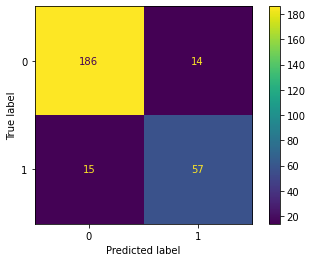

In [85]:
# evaluating preformance of logistic regression
pred00log_split = r00_log_split.predict(X_test1)
pred00log_split = list(map(round,pred00log_split))
print(accuracy_score(y_test1, pred00log_split))
print('\nTest accuracy : \n', accuracy_score(y_test1, pred00log_split))
# plotting confusion matrix
cm00log_split = confusion_matrix(y_test1, pred00log_split) 
print ('\nConfusion Matrix : \n', cm00log_split)
cm00log_split_display = metrics.ConfusionMatrixDisplay(confusion_matrix = cm00log_split)
cm00log_split_display.plot()
acc_log_split = metrics.accuracy_score(y_test1, pred00log_split)
print('accuracy', acc_log_split)
pre_log_split = metrics.precision_score(y_test1, pred00log_split, average = None)
print('precision', pre_log_split)
senrec_log_split = metrics.recall_score(y_test1, pred00log_split, average = None)
print('sensitivity recall', senrec_log_split)
f1_log_split = metrics.f1_score(y_test1, pred00log_split, average = None)
print('f1 score', f1_log_split)
pre_log_split_m = np.mean(pre_log_split)
senrec_log_split_m = np.mean(senrec_log_split)
f1_log_split_m = np.mean(f1_log_split)
print('mean precision', pre_log_split_m)
print('mean recall', senrec_log_split_m)
print('mean f1 score', f1_log_split_m)

### Random Forest Classification

In [2]:
# preparing for modelling
y = dfacrpv['acp']
x = dfacrpv[cnvif] 

Train data accuracy: 0.9986842105263158
Test data accuracy: 0.9510703363914373
accuracy 0.9510703363914373
precision [0.94820717 0.96052632]
sensitivity recall [0.98755187 0.84883721]
f1 score [0.96747967 0.90123457]
mcc score 0.871811196351556
kappa 0.8688787529447146


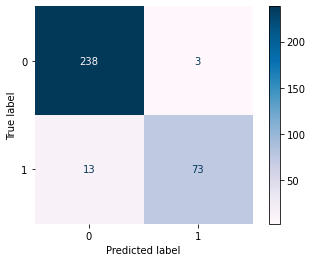

In [56]:
# splitting data into train set and test set
X_train, X_test, y_train, y_test = train_test_split(x, y,
                                                    test_size = 0.3, 
                                                    random_state = 7)
# setting parameters for random forest classifier
rfc = RandomForestClassifier(n_estimators=20, max_depth=10, 
                              random_state = 7) 
# applying random forest classification
rfc.fit(X_train, y_train)
y_pred_rfc = rfc.predict(X_test)
# evaluating the performance of random forest classification model
print("Train data accuracy:",accuracy_score(y_true = y_train, y_pred = rfc.predict(X_train)))
print("Test data accuracy:",accuracy_score(y_true = y_test, y_pred = y_pred_rfc))
# plotting confusion matrix
confusion_matrix_rfc = metrics.confusion_matrix(y_test, y_pred_rfc)
cm_display_rfc = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix_rfc)
cm_display_rfc.plot(cmap = 'PuBu')
plt.box(False)
acc_rfc = metrics.accuracy_score(y_test, y_pred_rfc)
print('accuracy', acc_rfc)
pre_rfc = metrics.precision_score(y_test, y_pred_rfc, average = None)
print('precision', pre_rfc)
senrec_rfc = metrics.recall_score(y_test, y_pred_rfc, average = None)
print('sensitivity recall', senrec_rfc)
f1_rfc = metrics.f1_score(y_test, y_pred_rfc, average = None)
print('f1 score', f1_rfc)
mcc_rfc = metrics.matthews_corrcoef(y_test, y_pred_rfc)
print('mcc score', mcc_rfc)
ka_rfc= metrics.cohen_kappa_score(y_test, y_pred_rfc)
print('kappa', ka_rfc)

In [700]:
# finding the best number of estimator
# rf = RandomForestClassifier(n_estimators=50, max_depth=10, n_jobs=-1)
# rf.fit(X_train, y_train)
# predictions = []
# for tree in rf.estimators_:
#     predictions.append(tree.predict_proba(X_test)[None, :])
# predictions = np.vstack(predictions)
# cum_mean = np.cumsum(predictions, axis=0)/np.arange(1, predictions.shape[0] + 1)[:, None, None]
# scores = []
# for pred in cum_mean:
#     scores.append(accuracy_score(y_test, np.argmax(pred, axis=1)))
# plt.figure(figsize=(10, 6))
# plt.plot(scores, linewidth=3)
# plt.xlabel('num_trees')
# plt.ylabel('accuracy')
# according to the result, 10 is the best number of trees

In [3]:
# plotting feature importance
feature_name = list(x.columns.values.tolist())
importances = rfc.feature_importances_
df_rfc = pd.DataFrame({'features':feature_name, 'importances':importances})
df_rfc.sort_values(by = ['importances'], ascending = False, inplace = True)
df_rfct = df_rfc.nlargest(20, 'importances')
plt.figure(figsize = [10,8])
sn.set(font = 'Times new roman')
sn.barplot(x = df_rfct['importances'], y = df_rfct['features'],palette = "PuBu_r_d")
plt.xlabel('importance')
plt.ylabel('feature')
plt.box(False)
# plt.savefig('svp_rf_importance_paper.png', dpi = 300)

In [60]:
print(df_rfc.head(20))

        features  importances
19  bicyclecount     0.207195
16         droad     0.186972
3            mew     0.067357
12       dparktw     0.058145
6          dbusl     0.037296
7         dtraml     0.036677
15  dtrafficarea     0.036409
2             ie     0.028884
14     dstopsign     0.027559
10      dstation     0.026381
4            meg     0.025534
20      carcount     0.025227
11      dparkcar     0.024813
13       dpedcro     0.023665
17       gvm_dwv     0.023052
9        dplight     0.022875
5         megmax     0.021723
8        dtrainl     0.017451
0             cp     0.008614
25       z_qnr_6     0.008383


In [58]:
# saving the random forest classifer to a file
# joblib.dump(rfc, "my_random_forest_1_cnvif60.joblib")